In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#!python3 -m spacy download en_core_web_sm

In [3]:
#Load Spacy English language model

nlp = spacy.load('en_core_web_sm')

In [4]:
# Load Books

import os

#Get books form the data directory

all_books = [b for b in os.scandir('data') if '.txt' in b.name]

In [5]:
all_books

[<DirEntry '2 The Sword of Destiny.txt'>,
 <DirEntry '3 Blood of Elves.txt'>,
 <DirEntry '7 The Lady of the Lake.txt'>,
 <DirEntry '4 Times of Contempt.txt'>,
 <DirEntry '1 The Last Wish.txt'>,
 <DirEntry '8 something ends something begins.txt'>,
 <DirEntry '6 The Tower of the Swallow.txt'>,
 <DirEntry '5 Baptism of Fire.txt'>]

In [6]:
book = all_books[0]
book_text = open(book).read()
book_doc = nlp(book_text)
len(book_doc)

151812

In [7]:
#Visualize identified entities

displacy.render(book_doc[0:2000], style='ent', jupyter=True)

In [8]:
#Load Character Names

character_df =  pd.read_csv('character.csv', index_col=0)

In [9]:
character_df

book               character
0      Category:Baptism of Fire characters                  Adalia
1      Category:Baptism of Fire characters                   Adela
2      Category:Baptism of Fire characters           Aen Saevherne
3      Category:Baptism of Fire characters                Aevenien
4      Category:Baptism of Fire characters                  Aglaïs
...                                    ...                     ...
1270  Category:Time of Contempt characters        Yanna of Murivel
1271  Category:Time of Contempt characters           Yarpen Zigrin
1272  Category:Time of Contempt characters  Yennefer of Vengerberg
1273  Category:Time of Contempt characters         Yiolenta Suarez
1274  Category:Time of Contempt characters                   Zyvik

[1275 rows x 2 columns]

In [10]:
character_df['character']

0                       Adalia
1                        Adela
2                Aen Saevherne
3                     Aevenien
4                       Aglaïs
                 ...          
1270          Yanna of Murivel
1271             Yarpen Zigrin
1272    Yennefer of Vengerberg
1273           Yiolenta Suarez
1274                     Zyvik
Name: character, Length: 1275, dtype: object

In [11]:
#Delete brackets and name between brackets in some character names. e.g: Cirilla Fiona (first born)

import re
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]","", x))
character_df['character_first_name'] = character_df['character'].apply(lambda x: x.split(' ',1)[0])

In [12]:
pd.set_option('display.max_rows', None)
character_df.head()

book      character character_first_name
0  Category:Baptism of Fire characters         Adalia               Adalia
1  Category:Baptism of Fire characters          Adela                Adela
2  Category:Baptism of Fire characters  Aen Saevherne                  Aen
3  Category:Baptism of Fire characters       Aevenien             Aevenien
4  Category:Baptism of Fire characters         Aglaïs               Aglaïs

In [13]:
sent_entity_df = []

#Loop through sentences, store name entity list for each sentence

for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({'sentence': sent, 'entities': entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [14]:
sent_entity_df.head()

sentence  \
0      (﻿The, Limits, of, the, Possible, \n, I, \n, "...   
1      (", It, 's, been, an, hour, and, a, quarter, s...   
2                                 (He, 's, done, for, .)   
3      (", \n, The, townsfolk, ,, huddled, together, ...   
4      (A, fat, man, dressed, in, a, yellow, smock, \...   
5      (", We, have, to, wait, a, bit, longer, ,, ", ...   
6      (", Why, wait, ?, ", snorted, pimply, ,, ", Th...   
7      (Anyone, goes, down, there, ,, that, 's, the, ...   
8      (Have, you, forgotten, how, many, \n, have, di...   
9      (What, are, we, waiting, for, ?, ", \n, ", Thi...   
10     (", An, agreement, you, made, with, a, living,...   
11     (", He, is, now, dead, ,, as, surely, as, the,...   
12     (It, was, plain, from, the, beginning, that, h...   
13     (He, did, n't, even, take, a, mirror, with, hi...   
14     (", \n, ", At, least, we, 've, saved, some, co...   
15                   (You, might, as, well, go, home, .)   
16     (As, far, as, the, sorcerer, 's, horse, and, b...   
17     (", \n, ", Yes, ,, ", said, the, butcher, ,, "...   
18                           (Let, 's, take, a, look, .)   
19     (", \n, ", What, are, you, doing, ?, ", \n, ",...   
20     (Do, n't, get, in, the, way, unless, you, want...   
21     (", A, fine, old, mare, ,, ", repeated, the, b...   
22      (", Leave, the, horse, alone, ,, my, darling, .)   
23     (", \n, The, butcher, slowly, turned, around, ...   
24     (The, stranger, had, thick, curly, brown, hair...   
25                         (He, had, no, weapons, ., \n)   
26     (3, \n, ", Step, away, from, the, horse, ,, ",...   
27                          (", What, have, we, here, ?)   
28     (A, horse, and, saddlebags, belonging, to, ano...   
29     (Is, that, honourable, ?, ", \n, Pimply, slowl...   
30     (The, butcher, gave, a, nod, and, signalled, t...   
31     (Both, carried, heavy, clubs, ,, like, those, ...   
32     (", Who, are, you, ?, ", demanded, the, pimply...   
33     (", That, 's, none, of, your, business, ,, my,...   
34                (", \n, ", You, carry, no, weapons, .)   
35     (", \n, ", That, 's, true, ,, ", the, stranger...   
36     (", \n, ", That, 's, no, good, ,, ", pimply, d...   
37     (", \n, The, butcher, also, drew, a, blade, ;,...   
38     (The, other, two, men, approached, ,, brandish...   
39     (", I, do, n't, carry, weapons, ,, ", responde...   
40     (", \n, From, behind, the, ruins, ,, two, youn...   
41     (The, crowd, quickly, parted, ,, retreated, th...   
42     (The, girls, smiled, ,, flashing, their, teeth...   
43     (They, had, blue, stripes, tattooed, from, the...   
44     (Lynx, pelt, clad, their, strong, muscles, fro...   
45     (From, behind, the, mail, -, clad, shoulder, o...   
46     (Pimply, got, down, on, one, knee, and, slowly...   
47     (From, the, hole, in, ruins, came, a, rumble, ...   
48     (Following, the, hands, ,, a, white, head, app...   
49               (A, murmur, escaped, the, crowd, ., \n)   
50     (The, alabaster, -, haired, man, straightened,...   
51     (Holding, the, beast, by, its, long, lizard, -...   
52     (The, burgrave, jumped, backwards, and, trippe...   
53     (Its, slashed, throat, ,, once, carmine, ,, wa...   
54              (Its, sunken, eyes, were, glassy, ., \n)   
55     (", Here, 's, the, basilisk, ,, ", said, the, ...   
56     (I, will, check, them, ,, I, 'm, warning, you, .)   
57     (", \n, 4, \n, With, shaking, hands, ,, the, b...   
58     (The, white, -, haired, man, looked, around, a...   
59     (He, also, noticed, the, man, in, the, brown, ...   
60     (", It, 's, always, the, same, ,, ", he, said,...   
61     (You, people, never, change, ,, damn, you, to,...   
62     (", We, have, n't, touched, your, bags, ,, ", ...   
63     (The, men, armed, with, the, clubs, had, long,...   
64     (", Your, things, have, not, been, disturbed, ...   
65     (At, the, sight, of, his, smile, ,, which, blo...   
66     (", And, that, is, wh

In [15]:
#Function that filters entities that are not characters

def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list
            if ent in list(character_df.character)
            or ent in list(character_df.character_first_name)]    

In [16]:
filter_entity(['Ciri','Yennefer','two'], character_df)

['Ciri', 'Yennefer']

In [17]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

In [18]:
#Remove sentences that have no entities

sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

sentence         entities  \
96   (Is, there, anything, keeping, you, in, this, ...  [Geralt, Rivia]   
104  (", \n, ", Borch, ,, ", replied, Geralt, ,, wh...  [Borch, Geralt]   
108  (", \n, ", There, are, some, ,, ", Geralt, rep...         [Geralt]   
140  (", I, forgot, ,, ", Three, Jackdaws, winked, ...  [Three, Geralt]   
151  (Geralt, loosened, his, belt, ,, removed, his,...         [Geralt]   
157  (", Do, the, girls, speak, the, common, langua...         [Geralt]   
160  (How, 's, your, soup, ,, Geralt, ?, ", \n, ", ...         [Geralt]   
172  (Yet, there, is, a, certain, principal, underl...         [Geralt]   
201    (", Bad, example, ,, ", interrupted, Geralt, .)    [Bad, Geralt]   
211  (", I, do, not, hunt, dragons, ,, ", Geralt, r...         [Geralt]   

    character_entities  
96            [Geralt]  
104           [Geralt]  
108           [Geralt]  
140           [Geralt]  
151           [Geralt]  
157           [Geralt]  
160           [Geralt]  
172           [Geralt]  
201           [Geralt]  
211           [Geralt]

In [19]:
#Take only first name of charachters

sent_entity_df_filtered['character_entities']= sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                             for item in x])

/var/folders/k_/r7lt0qq16rjb59h6p_fphwnm0000gn/T/ipykernel_15480/1762908115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities']= sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [20]:
pd.reset_option('^display.', silent= True)
sent_entity_df_filtered

sentence         entities  \
96     (Is, there, anything, keeping, you, in, this, ...  [Geralt, Rivia]   
104    (", \n, ", Borch, ,, ", replied, Geralt, ,, wh...  [Borch, Geralt]   
108    (", \n, ", There, are, some, ,, ", Geralt, rep...         [Geralt]   
140    (", I, forgot, ,, ", Three, Jackdaws, winked, ...  [Three, Geralt]   
151    (Geralt, loosened, his, belt, ,, removed, his,...         [Geralt]   
...                                                  ...              ...   
11278           (The, scene, left, Yurga, speechless, .)          [Yurga]   
11290  (Yurga, did, n't, see, Geralt, 's, face, ,, hi...         [Geralt]   
11291  (He, only, saw, black, -, gloved, hands, squee...           [Ciri]   
11302  (", \n, ", It, 's, just, like, they, predicted...         [Geralt]   
11309  (With, good, reason, :, \n, ", You, 're, more,...           [Ciri]   

      character_entities  
96              [Geralt]  
104             [Geralt]  
108             [Geralt]  
140             [Geralt]  
151             [Geralt]  
...                  ...  
11278            [Yurga]  
11290           [Geralt]  
11291             [Ciri]  
11302           [Geralt]  
11309             [Ciri]  

[1273 rows x 3 columns]

## Create Relationships


In [21]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i + window_size, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i:end_i].character_entities), [])
    
    #Remove duplicated characters that are next to eachother
    char_unique = [char_list[i] for i in range(len(char_list))
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({'source':a, 'target': b})

In [22]:
relationships_df = pd.DataFrame(relationships)
relationships_df

source    target
0       Geralt  Niedamir
1       Geralt  Niedamir
2       Geralt  Niedamir
3     Niedamir    Geralt
4     Niedamir    Geralt
...        ...       ...
2196    Geralt      Ciri
2197    Geralt      Ciri
2198    Geralt      Ciri
2199    Geralt      Ciri
2200    Geralt      Ciri

[2201 rows x 2 columns]

In [23]:
pd.set_option('display.max_rows', None)
relationships_df.head()

source             target
0                Geralt           Niedamir
1                Geralt           Niedamir
2                Geralt           Niedamir
3              Niedamir             Geralt
4              Niedamir             Geralt
5              Niedamir             Geralt
6              Niedamir             Geralt
7              Niedamir             Geralt
8              Niedamir             Geralt
9                Geralt               Eyck
10                 Eyck             Geralt
11                 Eyck             Geralt
12                 Eyck             Geralt
13               Geralt               Eyck
14                 Eyck             Geralt
15               Geralt               Eyck
16                 Eyck             Geralt
17               Geralt               Eyck
18               Geralt               Eyck
19           Dorregaray             Geralt
20           Dorregaray             Geralt
21           Dorregaray             Geralt
22           Dorregaray             Geralt
23           Dorregaray             Geralt
24           Dorregaray             Geralt
25               Geralt         Dorregaray
26               Geralt         Dorregaray
27           Dorregaray           Yennefer
28             Yennefer         Dorregaray
29             Yennefer         Dorregaray
30             Yennefer         Dorregaray
31             Yennefer         Dorregaray
32             Yennefer         Dorregaray
33             Yennefer         Dorregaray
34               Geralt             Yarpen
35               Geralt             Yarpen
36               Geralt             Yarpen
37         Gyllenstiern           Niedamir
38         Gyllenstiern           Niedamir
39         Gyllenstiern           Niedamir
40               Geralt             Kennet
41               Geralt             Kennet
42               Geralt             Yarpen
43               Geralt             Yarpen
44               Geralt             Yarpen
45               Geralt             Yarpen
46               Geralt             Yarpen
47               Yarpen         Dorregaray
48               Yarpen         Dorregaray
49           Dorregaray           Yennefer
50               Yarpen         Dorregaray
51           Dorregaray           Yennefer
52               Yarpen         Dorregaray
53           Dorregaray           Yennefer
54           Dorregaray           Yennefer
55             Yennefer             Boholt
56           Dorregaray           Yennefer
57             Yennefer             Boholt
58               Boholt       Gyllenstiern
59             Yennefer             Boholt
60               Boholt       Gyllenstiern
61         Gyllenstiern           Yennefer
62               Boholt       Gyllenstiern
63         Gyllenstiern           Yennefer
64               Boholt       Gyllenstiern
65         Gyllenstiern           Yennefer
66               Boholt       Gyllenstiern
67         Gyllenstiern           Yennefer
68         Gyllenstiern           Yennefer
69             Yennefer             Boholt
70             Yennefer             Boholt
71             Yennefer             Boholt
72             Yennefer             Boholt
73             Yennefer             Boholt
74             Yennefer             Boholt
75             Yennefer             Boholt
76               Boholt             Yarpen
77             Yennefer             Boholt
78               Boholt             Yarpen
79             Yennefer             Boholt
80               Boholt             Yarpen
81             Yennefer             Boholt
82               Boholt             Yarpen
83               Boholt             Yarpen
84               Boholt             Yarpen
85               Yarpen             Geralt
86               Geralt           Niedamir
87               Geralt           Niedamir
88               Geralt           Niedamir
89               Geralt           Niedamir
90             Niedamir             Yarpen
91             Niedamir             Yarpen
92             Nie

In [24]:
#relationships_df.sort_values(by=['value'], ascending=False)

In [25]:
#Sort relationships with a->b and b->a

relationships_df = pd.DataFrame(np.sort(relationships_df.values, axis = 1), columns=relationships_df.columns)
relationships_df.head()

source             target
0                Geralt           Niedamir
1                Geralt           Niedamir
2                Geralt           Niedamir
3                Geralt           Niedamir
4                Geralt           Niedamir
5                Geralt           Niedamir
6                Geralt           Niedamir
7                Geralt           Niedamir
8                Geralt           Niedamir
9                  Eyck             Geralt
10                 Eyck             Geralt
11                 Eyck             Geralt
12                 Eyck             Geralt
13                 Eyck             Geralt
14                 Eyck             Geralt
15                 Eyck             Geralt
16                 Eyck             Geralt
17                 Eyck             Geralt
18                 Eyck             Geralt
19           Dorregaray             Geralt
20           Dorregaray             Geralt
21           Dorregaray             Geralt
22           Dorregaray             Geralt
23           Dorregaray             Geralt
24           Dorregaray             Geralt
25           Dorregaray             Geralt
26           Dorregaray             Geralt
27           Dorregaray           Yennefer
28           Dorregaray           Yennefer
29           Dorregaray           Yennefer
30           Dorregaray           Yennefer
31           Dorregaray           Yennefer
32           Dorregaray           Yennefer
33           Dorregaray           Yennefer
34               Geralt             Yarpen
35               Geralt             Yarpen
36               Geralt             Yarpen
37         Gyllenstiern           Niedamir
38         Gyllenstiern           Niedamir
39         Gyllenstiern           Niedamir
40               Geralt             Kennet
41               Geralt             Kennet
42               Geralt             Yarpen
43               Geralt             Yarpen
44               Geralt             Yarpen
45               Geralt             Yarpen
46               Geralt             Yarpen
47           Dorregaray             Yarpen
48           Dorregaray             Yarpen
49           Dorregaray           Yennefer
50           Dorregaray             Yarpen
51           Dorregaray           Yennefer
52           Dorregaray             Yarpen
53           Dorregaray           Yennefer
54           Dorregaray           Yennefer
55               Boholt           Yennefer
56           Dorregaray           Yennefer
57               Boholt           Yennefer
58               Boholt       Gyllenstiern
59               Boholt           Yennefer
60               Boholt       Gyllenstiern
61         Gyllenstiern           Yennefer
62               Boholt       Gyllenstiern
63         Gyllenstiern           Yennefer
64               Boholt       Gyllenstiern
65         Gyllenstiern           Yennefer
66               Boholt       Gyllenstiern
67         Gyllenstiern           Yennefer
68         Gyllenstiern           Yennefer
69               Boholt           Yennefer
70               Boholt           Yennefer
71               Boholt           Yennefer
72               Boholt           Yennefer
73               Boholt           Yennefer
74               Boholt           Yennefer
75               Boholt           Yennefer
76               Boholt             Yarpen
77               Boholt           Yennefer
78               Boholt             Yarpen
79               Boholt           Yennefer
80               Boholt             Yarpen
81               Boholt           Yennefer
82               Boholt             Yarpen
83               Boholt             Yarpen
84               Boholt             Yarpen
85               Geralt             Yarpen
86               Geralt           Niedamir
87               Geralt           Niedamir
88               Geralt           Niedamir
89               Geralt           Niedamir
90             Niedamir             Yarpen
91             Niedamir             Yarpen
92             Nie

In [26]:
relationships_df['value']= 1

relationships_df = relationships_df.groupby(['source','target'], sort=False, as_index= False).sum()

In [27]:
a = relationships_df.sort_values(['value'],ascending=False)#.head(10)
a.head()

source             target  value
22              Geralt           Yennefer    197
3           Dorregaray           Yennefer    100
63                Essi             Geralt     96
86                Ciri             Geralt     90
18              Yarpen           Yennefer     88
87                Ciri             Eithné     79
8               Boholt           Yennefer     66
37             Istredd           Yennefer     55
11              Boholt             Yarpen     55
1                 Eyck             Geralt     52
79              Eithné             Geralt     48
76              Braenn               Ciri     47
78              Braenn             Geralt     39
29              Boholt         Dorregaray     36
44              Dainty             Geralt     36
2           Dorregaray             Geralt     36
14              Boholt             Geralt     35
5         Gyllenstiern           Niedamir     33
80              Braenn             Eithné     33
25          Dorregaray               Eyck     29
71                Essi           Yennefer     27
54           Dandelion             Geralt     27
40              Geralt            Istredd     26
13              Boholt               Eyck     25
96              Eithné            Venzlav     25
58              Geralt           Sh'eenaz     24
31                Eyck             Yarpen     23
121             Geralt              Yurga     22
23              Geralt       Gyllenstiern     21
70           Dandelion               Essi     19
85                Ciri            Kistrin     19
0               Geralt           Niedamir     19
10        Gyllenstiern           Yennefer     19
9               Boholt       Gyllenstiern     19
48              Dainty              Vimme     17
33                Eyck       Gyllenstiern     16
19            Niedamir           Yennefer     16
90              Ervyll             Geralt     15
27                Eyck           Niedamir     15
111               Ciri           Levecque     15
4               Geralt             Yarpen     15
21              Boholt           Niedamir     14
36              Geralt  Villentretenmerth     14
20          Dorregaray           Niedamir     13
12            Niedamir             Yarpen     13
24          Dorregaray       Gyllenstiern     12
72            Sh'eenaz           Yennefer     11
92           Freixenet             Geralt     11
115           Junghans           Levecque     11
97              Geralt            Venzlav     11
109             Ervyll            Venzlav     11
114             Geralt           Levecque     11
41              Geralt                Two     11
45              Dainty          Dandelion     10
52              Geralt            Vespula     10
28                Eyck           Yennefer     10
55           Dandelion            Vespula     10
42            Herbolth            Istredd     10
91                Ciri          Freixenet     10
126             Geralt              Lytta      9
98              Eithné             Morenn      9
122             Geralt            Visenna      9
59           Dandelion           Sh'eenaz      8
7           Dorregaray             Yarpen      8
35   Villentretenmerth           Yennefer      8
16              Boholt             Kennet      8
100             Braenn               Mona      8
47              Geralt              Vimme      7
64                Essi           Sh'eenaz      7
112          Freixenet           Levecque      7
108               Ciri            Venzlav      7
110             Ervyll            Viraxas      6
88              Braenn            Vesemir      6
83              Braenn             Voymir      6
117               Ciri          Mousesack      6
128             Geralt              Roach      6
15              Boholt           Crinfrid      6
32                Eyck  Villentretenmerth      6
26        Gyllenstiern             Yarpen      6
61               Dalia            Mestvin      6
30              Kennet             Yarpen      

## Graph Analysis and Visualization

In [28]:
#!pip3 install scipy

In [29]:
#Create graph from Pandas dataframe

G = nx.from_pandas_edgelist(relationships_df,
                            source = 'source',
                            target = 'target',
                           edge_attr= 'value',
                           create_using=nx.Graph())

In [30]:
relationships_df.head()

source             target  value
0               Geralt           Niedamir     19
1                 Eyck             Geralt     52
2           Dorregaray             Geralt     36
3           Dorregaray           Yennefer    100
4               Geralt             Yarpen     15
5         Gyllenstiern           Niedamir     33
6               Geralt             Kennet      2
7           Dorregaray             Yarpen      8
8               Boholt           Yennefer     66
9               Boholt       Gyllenstiern     19
10        Gyllenstiern           Yennefer     19
11              Boholt             Yarpen     55
12            Niedamir             Yarpen     13
13              Boholt               Eyck     25
14              Boholt             Geralt     35
15              Boholt           Crinfrid      6
16              Boholt             Kennet      8
17              Kennet           Yennefer      4
18              Yarpen           Yennefer     88
19            Niedamir           Yennefer     16
20          Dorregaray           Niedamir     13
21              Boholt           Niedamir     14
22              Geralt           Yennefer    197
23              Geralt       Gyllenstiern     21
24          Dorregaray       Gyllenstiern     12
25          Dorregaray               Eyck     29
26        Gyllenstiern             Yarpen      6
27                Eyck           Niedamir     15
28                Eyck           Yennefer     10
29              Boholt         Dorregaray     36
30              Kennet             Yarpen      6
31                Eyck             Yarpen     23
32                Eyck  Villentretenmerth      6
33                Eyck       Gyllenstiern     16
34        Gyllenstiern             Kennet      5
35   Villentretenmerth           Yennefer      8
36              Geralt  Villentretenmerth     14
37             Istredd           Yennefer     55
38              Geralt           Herbolth      5
39              Geralt                Ivo      4
40              Geralt            Istredd     26
41              Geralt                Two     11
42            Herbolth            Istredd     10
43             Vespula           Yennefer      5
44              Dainty             Geralt     36
45              Dainty          Dandelion     10
46              Dainty               Rhyd      1
47              Geralt              Vimme      7
48              Dainty              Vimme     17
49                Ther              Vimme      4
50             Sulimir              Vimme      1
51           Rhundurin              Vimme      6
52              Geralt            Vespula     10
53                Dudu             Geralt      4
54           Dandelion             Geralt     27
55           Dandelion            Vespula     10
56           Dandelion               Dudu      1
57              Dainty               Dudu      1
58              Geralt           Sh'eenaz     24
59           Dandelion           Sh'eenaz      8
60               Dalia             Teleri      5
61               Dalia            Mestvin      6
62           Dandelion            Mestvin      5
63                Essi             Geralt     96
64                Essi           Sh'eenaz      7
65              Geralt             Gerard      1
66            Sh'eenaz             Zelest      2
67                Duke               Essi      5
68              Geralt            Veverka      4
69             Veverka           Yennefer      4
70           Dandelion               Essi     19
71                Essi           Yennefer     27
72            Sh'eenaz           Yennefer     11
73                Essi             Zelest      4
74                Juan              Putzi      6
75             Cynthia               Essi      4
76              Braenn               Ciri     47
77               Dunca             Eithné      1
78              Braenn             Geralt     39
79              Eithné             Geralt     48
80              Braenn             Eithné     3

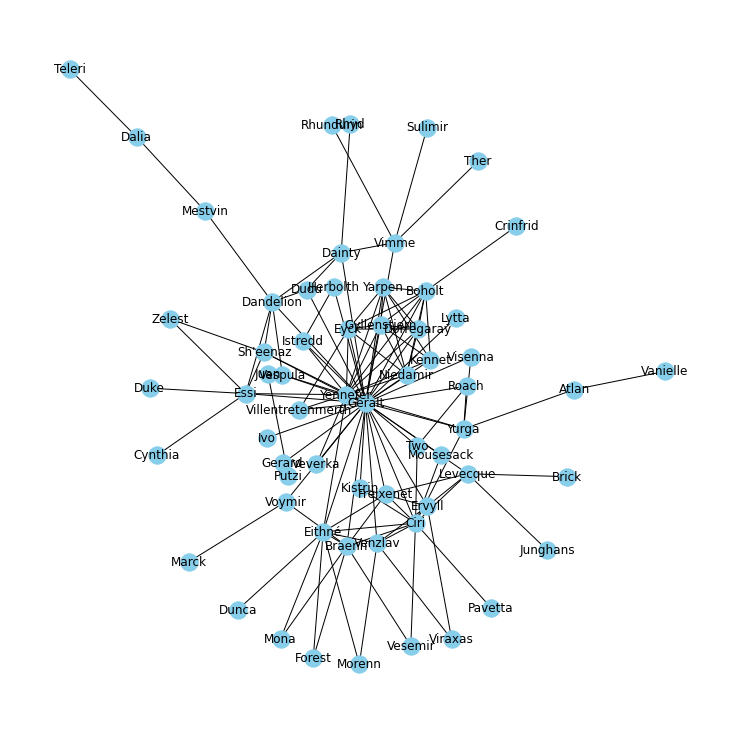

In [31]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True,node_color = 'skyblue', edge_cmap=plt.cm.Blues,pos=pos)
plt.show()

In [32]:
from pyvis.network import Network

net=Network(notebook=True, width='1000px', height='700px', bgcolor='#222222',font_color='white')

node_degree = dict(G.degree)

#Setting node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show('witcher.html')

In [33]:
most_important = ['Geralt','Essi','Yennefer','Ciri','Eithné','Yarpen']
most_important[0]

'Geralt'

In [34]:
source_char_name = relationships_df['source'].unique()
type(source_char_name)

numpy.ndarray

In [35]:
target_char_name = relationships_df['target'].unique()

In [36]:
char_name = np.concatenate((source_char_name, target_char_name), axis=None)#.unique()
char_name = list(char_name)
char_name = sorted(char_name)

In [37]:
char_name_unique =[]
for i in char_name:
    if i not in char_name_unique:
        char_name_unique.append(i)

In [38]:
for ele in enumerate(char_name_unique):
    print (ele)

(0, 'Atlan')
(1, 'Boholt')
(2, 'Braenn')
(3, 'Brick')
(4, 'Ciri')
(5, 'Crinfrid')
(6, 'Cynthia')
(7, 'Dainty')
(8, 'Dalia')
(9, 'Dandelion')
(10, 'Dorregaray')
(11, 'Dudu')
(12, 'Duke')
(13, 'Dunca')
(14, 'Eithné')
(15, 'Ervyll')
(16, 'Essi')
(17, 'Eyck')
(18, 'Forest')
(19, 'Freixenet')
(20, 'Geralt')
(21, 'Gerard')
(22, 'Gyllenstiern')
(23, 'Herbolth')
(24, 'Istredd')
(25, 'Ivo')
(26, 'Juan')
(27, 'Junghans')
(28, 'Kennet')
(29, 'Kistrin')
(30, 'Levecque')
(31, 'Lytta')
(32, 'Marck')
(33, 'Mestvin')
(34, 'Mona')
(35, 'Morenn')
(36, 'Mousesack')
(37, 'Niedamir')
(38, 'Pavetta')
(39, 'Putzi')
(40, 'Rhundurin')
(41, 'Rhyd')
(42, 'Roach')
(43, "Sh'eenaz")
(44, 'Sulimir')
(45, 'Teleri')
(46, 'Ther')
(47, 'Two')
(48, 'Vanielle')
(49, 'Venzlav')
(50, 'Vesemir')
(51, 'Vespula')
(52, 'Veverka')
(53, 'Villentretenmerth')
(54, 'Vimme')
(55, 'Viraxas')
(56, 'Visenna')
(57, 'Voymir')
(58, 'Yarpen')
(59, 'Yennefer')
(60, 'Yurga')
(61, 'Zelest')


In [39]:
a = relationships_df.query('source=="Boholt"| target=="Boholt"')#.sum()
a

source        target  value
8   Boholt      Yennefer     66
9   Boholt  Gyllenstiern     19
11  Boholt        Yarpen     55
13  Boholt          Eyck     25
14  Boholt        Geralt     35
15  Boholt      Crinfrid      6
16  Boholt        Kennet      8
21  Boholt      Niedamir     14
29  Boholt    Dorregaray     36

In [40]:
len(char_name_unique)

62

In [41]:
type(char_name_unique)

list

In [42]:
def rel_per_char(list):
    rel_num = {}
    for name in list:
        rel_num[name] = relationships_df.query('source==@name | target==@name').sum()[2]
    return rel_num

In [43]:
rel_num_dict = rel_per_char(char_name_unique)
rel_num_dict

{'Atlan': 8,
 'Boholt': 264,
 'Braenn': 144,
 'Brick': 6,
 'Ciri': 284,
 'Crinfrid': 6,
 'Cynthia': 4,
 'Dainty': 65,
 'Dalia': 11,
 'Dandelion': 80,
 'Dorregaray': 234,
 'Dudu': 6,
 'Duke': 5,
 'Dunca': 1,
 'Eithné': 209,
 'Ervyll': 36,
 'Essi': 162,
 'Eyck': 176,
 'Forest': 8,
 'Freixenet': 31,
 'Geralt': 931,
 'Gerard': 1,
 'Gyllenstiern': 131,
 'Herbolth': 15,
 'Istredd': 91,
 'Ivo': 4,
 'Juan': 6,
 'Junghans': 11,
 'Kennet': 25,
 'Kistrin': 26,
 'Levecque': 52,
 'Lytta': 9,
 'Marck': 5,
 'Mestvin': 11,
 'Mona': 11,
 'Morenn': 13,
 'Mousesack': 10,
 'Niedamir': 123,
 'Pavetta': 1,
 'Putzi': 6,
 'Rhundurin': 6,
 'Rhyd': 1,
 'Roach': 12,
 "Sh'eenaz": 52,
 'Sulimir': 1,
 'Teleri': 5,
 'Ther': 4,
 'Two': 18,
 'Vanielle': 6,
 'Venzlav': 62,
 'Vesemir': 9,
 'Vespula': 25,
 'Veverka': 8,
 'Villentretenmerth': 28,
 'Vimme': 35,
 'Viraxas': 10,
 'Visenna': 11,
 'Voymir': 16,
 'Yarpen': 214,
 'Yennefer': 617,
 'Yurga': 34,
 'Zelest': 6}

In [44]:
rel_num_df = pd.DataFrame.from_dict(rel_num_dict, orient='index', columns=['relationships'])
rel_num_df = rel_num_df.reset_index()
rel_num_df.columns = rel_num_df.columns.str.replace('index', 'name')
#rel_num_df.sort_values(by=['relationships'])
rel_num_df.head()
#rel_num_df['relationships'].dtypes

name  relationships
0   Atlan              8
1  Boholt            264
2  Braenn            144
3   Brick              6
4    Ciri            284

In [45]:
rel_num_df = rel_num_df.sort_values(['relationships'],ascending=False)
rel_num_df.head(10)

name  relationships
20      Geralt            931
59    Yennefer            617
4         Ciri            284
1       Boholt            264
10  Dorregaray            234
58      Yarpen            214
14      Eithné            209
17        Eyck            176
16        Essi            162
2       Braenn            144

## Most important characters

In [46]:
# Degree Centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'Geralt': 0.5901639344262295,
 'Niedamir': 0.11475409836065574,
 'Eyck': 0.13114754098360656,
 'Dorregaray': 0.11475409836065574,
 'Yennefer': 0.26229508196721313,
 'Yarpen': 0.13114754098360656,
 'Gyllenstiern': 0.13114754098360656,
 'Kennet': 0.0819672131147541,
 'Boholt': 0.14754098360655737,
 'Crinfrid': 0.01639344262295082,
 'Villentretenmerth': 0.04918032786885246,
 'Istredd': 0.04918032786885246,
 'Herbolth': 0.03278688524590164,
 'Ivo': 0.01639344262295082,
 'Two': 0.04918032786885246,
 'Vespula': 0.04918032786885246,
 'Dainty': 0.0819672131147541,
 'Dandelion': 0.11475409836065574,
 'Rhyd': 0.01639344262295082,
 'Vimme': 0.0819672131147541,
 'Ther': 0.01639344262295082,
 'Sulimir': 0.01639344262295082,
 'Rhundurin': 0.01639344262295082,
 'Dudu': 0.04918032786885246,
 "Sh'eenaz": 0.0819672131147541,
 'Dalia': 0.03278688524590164,
 'Teleri': 0.01639344262295082,
 'Mestvin': 0.03278688524590164,
 'Essi': 0.11475409836065574,
 'Gerard': 0.01639344262295082,
 'Zelest': 0.032786885

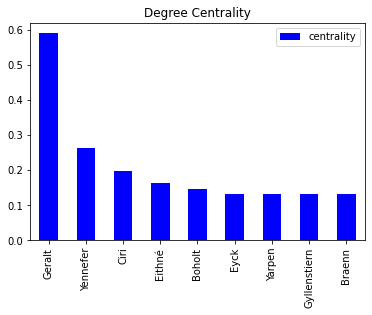

In [47]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index',columns=['centrality'])

#Plot top 10 nodes

degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar', color='blue')
plt.title('Degree Centrality')
plt.show();

In [48]:
degree_df.head()

centrality
Geralt        0.590164
Niedamir      0.114754
Eyck          0.131148
Dorregaray    0.114754
Yennefer      0.262295

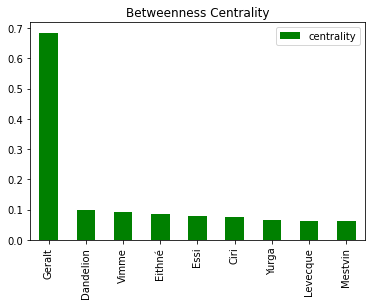

In [49]:
#Betweeness centrality 

betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index',columns=['centrality'])

#Plot top 10 nodes

betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar', color='green')
plt.title('Betweenness Centrality')
plt.show();

In [50]:
betweenness_df.head()

centrality
Geralt        0.683953
Niedamir      0.000000
Eyck          0.001093
Dorregaray    0.000000
Yennefer      0.060419

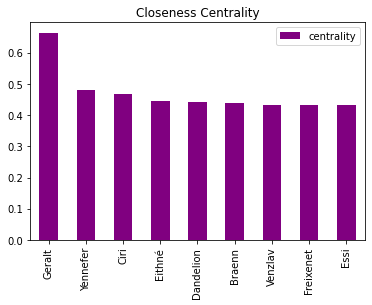

In [51]:
#Closeness Centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index',columns=['centrality'])

#Plot top 10 nodes

closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar', color='purple')
plt.title('Closeness Centrality')
plt.show();

In [52]:
closeness_df.head()

centrality
Geralt        0.663553
Niedamir      0.416537
Eyck          0.419600
Dorregaray    0.416537
Yennefer      0.479543

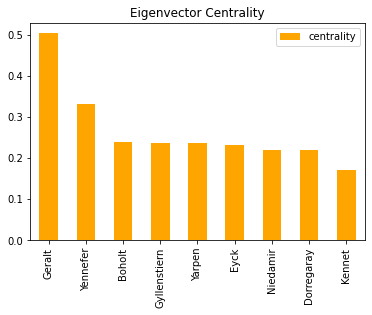

In [53]:
#Prestige/Eigenvector Centrality

prestige_dict= nx.eigenvector_centrality(G)
prestige_df = pd.DataFrame.from_dict(prestige_dict, orient='index',columns=['centrality'])


#Plot top 10 nodes

prestige_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar', color= 'orange')
plt.title('Eigenvector Centrality')
plt.show();

In [54]:
prestige_df.round(5).head()

centrality
Geralt         0.50299
Niedamir       0.22023
Eyck           0.23187
Dorregaray     0.22023
Yennefer       0.33092

In [55]:
#Save centrality measures


nx.set_node_attributes(G, degree_dict, 'degree centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness centrality')
nx.set_node_attributes(G, prestige_dict, 'pestrige centrality')

## Community Detection

In [56]:
#! pip3 install python-louvain

In [57]:
import community as community_louvain

In [58]:
communities = community_louvain.best_partition(G)
communities

{'Geralt': 2,
 'Niedamir': 1,
 'Eyck': 1,
 'Dorregaray': 1,
 'Yennefer': 1,
 'Yarpen': 1,
 'Gyllenstiern': 1,
 'Kennet': 1,
 'Boholt': 1,
 'Crinfrid': 1,
 'Villentretenmerth': 1,
 'Istredd': 2,
 'Herbolth': 2,
 'Ivo': 2,
 'Two': 2,
 'Vespula': 3,
 'Dainty': 3,
 'Dandelion': 3,
 'Rhyd': 3,
 'Vimme': 3,
 'Ther': 3,
 'Sulimir': 3,
 'Rhundurin': 3,
 'Dudu': 3,
 "Sh'eenaz": 3,
 'Dalia': 3,
 'Teleri': 3,
 'Mestvin': 3,
 'Essi': 3,
 'Gerard': 2,
 'Zelest': 3,
 'Duke': 3,
 'Veverka': 2,
 'Juan': 4,
 'Putzi': 4,
 'Cynthia': 3,
 'Braenn': 0,
 'Ciri': 0,
 'Dunca': 0,
 'Eithné': 0,
 'Marck': 2,
 'Voymir': 2,
 'Ervyll': 0,
 'Kistrin': 0,
 'Vesemir': 0,
 'Freixenet': 0,
 'Venzlav': 0,
 'Viraxas': 0,
 'Morenn': 0,
 'Mona': 0,
 'Forest': 0,
 'Pavetta': 0,
 'Levecque': 0,
 'Junghans': 0,
 'Brick': 0,
 'Mousesack': 0,
 'Yurga': 2,
 'Visenna': 2,
 'Atlan': 2,
 'Vanielle': 2,
 'Lytta': 2,
 'Roach': 2}

In [59]:
nx.set_node_attributes(G, communities, 'group')

In [60]:
com_net = Network(notebook=True, width='700px', height='600px', bgcolor='#222222',font_color='white')
com_net.from_nx(G)
com_net.show('witcher_communities.html')

## Evolution of Characters' Importance

In [61]:
#Initialize empty list of graphs of books

books_graph= []

all_books = [b for b in os.scandir('data') if '.txt' in b.name]

#sort dir entries by name

all_books.sort(key=lambda x: x.name)

In [62]:
from lib.utils.functions import *

In [63]:
# Loop through book list and create graphs
for book in all_books:
    book_text = ner(book)
    
    #Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    
    #Select only character entities
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

    #Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
    
    #Take only first name of characters
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])
    #Create relationship df
    relationship_df = create_relationship(sent_entity_df_filtered)
    
    #Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df,
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     

    books_graph.append(G)

/var/folders/k_/r7lt0qq16rjb59h6p_fphwnm0000gn/T/ipykernel_15480/3249171431.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
/var/folders/k_/r7lt0qq16rjb59h6p_fphwnm0000gn/T/ipykernel_15480/3249171431.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


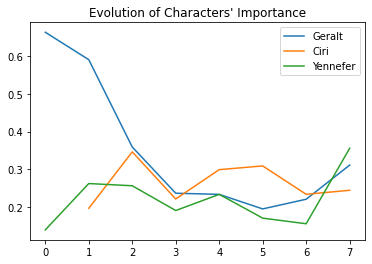

In [64]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Geralt","Ciri", "Yennefer"]].plot()
plt.title("Evolution of Characters' Importance")
plt.show();

In [65]:
#!pip3 install seaborn

In [66]:
import seaborn as sns

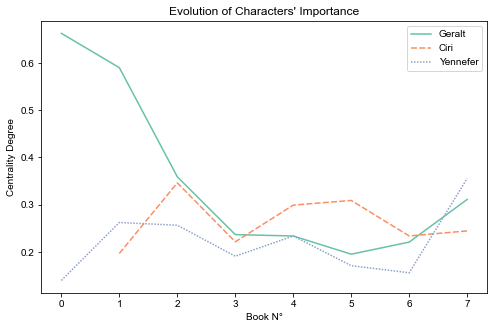

In [67]:
plt.figure(figsize=(8,5))
a = sns.lineplot(data=degree_evol_df[["Geralt","Ciri", "Yennefer"]], palette = "Set2")
sns.set(style='dark',)
a.set(xlabel ="Book N°", ylabel = "Centrality Degree", title ="Evolution of Characters' Importance")
plt.show()